In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def loadData():
    with np.load('notMNIST.npz') as dataset:
        Data, Target = dataset['images'], dataset['labels']
        posClass = 2
        negClass = 9
        dataIndx = (Target==posClass) + (Target==negClass)
        Data = Data[dataIndx]/255.
        Target = Target[dataIndx].reshape(-1, 1)
        Target[Target==posClass] = 1
        Target[Target==negClass] = 0
        np.random.seed(421)
        randIndx = np.arange(len(Data))
        np.random.shuffle(randIndx)
        Data, Target = Data[randIndx], Target[randIndx]
        trainData, trainTarget = Data[:3500], Target[:3500]
        validData, validTarget = Data[3500:3600], Target[3500:3600]
        testData, testTarget = Data[3600:], Target[3600:]
    return trainData, validData, testData, trainTarget, validTarget, testTarget

# 1. Loss Function and Gradient

In [ ]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [ ]:
def loss(W, b, x, y, reg):
  n = len(y)
  y_hat = sigmoid(x @ W + b)
  cost = (1/n)*((-y).T @ np.log(y_hat)-((1-y).T @ np.log(1-y_hat))) + reg/2 * (W.T @ W)
  return -cost

In [ ]:
def grad_loss(W, b, x, y, reg):
  n = len(y)
  y_hat = sigmoid(x @ W + b)
  W_grad = x.T @ (y_hat - y) + reg * W
  b_grad = sum(sigmoid(x @ W + b) - y)
  W_grad /= n
  b_grad /= n
  return W_grad, b_grad

In [ ]:
def predict(W, b, x):
  return np.round(sigmoid(x @ W + b))

In [ ]:
def accuracy(W, b, x, y):
  return sum(predict(W, b, x) == y) / len(y)

# 2. Gradient Descent Implementation

In [ ]:
def grad_descent(W, b, x, y, alpha, epochs, reg, error_tol, x_val, y_val):
  
  tra_loss = np.zeros(epochs)
  val_loss = np.zeros(epochs)
  tra_acc = np.zeros(epochs)
  val_acc = np.zeros(epochs)

  W_trained = W.copy()
  b_trained = b.copy()
  for i in range(epochs):

    W_grad, b_grad = grad_loss(W_trained, b_trained, x, y, reg)
    W_diff = alpha * W_grad
    W_trained -= W_diff
    b_trained -= alpha * b_grad

    tra_loss[i] = loss(W_trained, b_trained, x, y, reg)
    val_loss[i] = loss(W_trained, b_trained, x_val, y_val, reg)
    tra_acc[i] = accuracy(W_trained, b_trained, x, y)
    val_acc[i] = accuracy(W_trained, b_trained, x_val, y_val)

    # print('Epoch #' + (str)(i) + ':' +
    #       'training loss:' + (str)(tra_loss[i]) + ' ' +
    #       'validation loss:' + (str)(val_loss[i]) + ' ' +
    #       'training accuracy:' + (str)(tra_acc[i]) + ' ' +
    #       'validation accuracy:' + (str)(val_acc[i]))

    if (np.linalg.norm(W_diff) < error_tol):
      break

  return W_trained, b_trained, tra_loss, val_loss, tra_acc, val_acc
    

In [ ]:
def train(alpha, epochs, reg, error_tol):
  
  x, x_val, x_tes, y, y_val, y_tes = loadData()
  x = x.reshape(len(y), -1)
  x_val = x_val.reshape(len(y_val), -1)
  x_tes = x_tes.reshape(len(y_tes), -1)

  W = np.zeros((x.shape[1], 1))
  b = np.zeros(1)

  W_trained, b_trained, tra_loss, val_loss, tra_acc, val_acc = grad_descent(W, b, x, y, alpha, epochs, reg, error_tol, x_val, y_val)

  plt.plot(range(1,epochs+1), tra_loss, label="Training")
  plt.plot(range(1,epochs+1), val_loss, label="Validation")
  plt.xlabel("Epoch")
  plt.ylabel("Loss")
  plt.legend()
  plt.show()

  plt.plot(range(1,epochs+1), tra_acc, label="Training")
  plt.plot(range(1,epochs+1), val_acc, label="Validation")
  plt.xlabel("Epoch")
  plt.ylabel("Accuarcy")
  plt.legend()
  plt.show()

  report_acc = accuracy(W_trained, b_trained, x_tes, y_tes)

  return report_acc

# 3. Tuning the Learning Rate

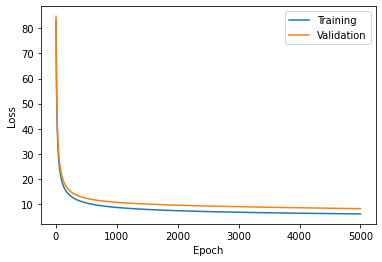

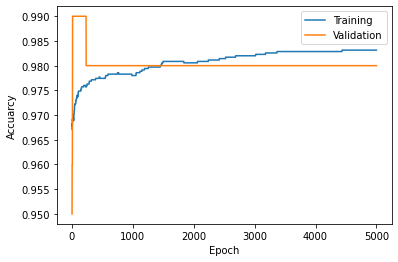

The reported accuracy for the learning rate  0.005  is:  [0.97931034]


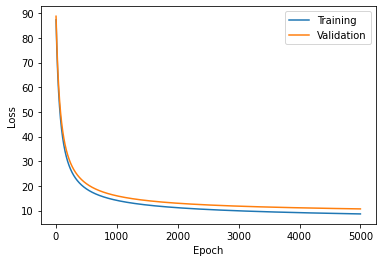

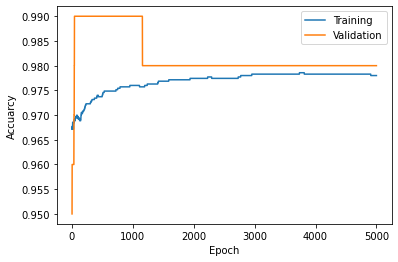

The reported accuracy for the learning rate  0.001  is:  [0.97241379]


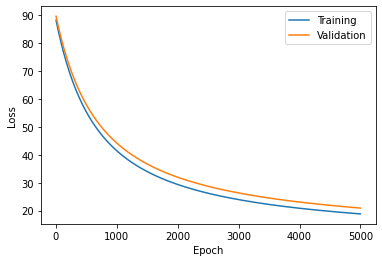

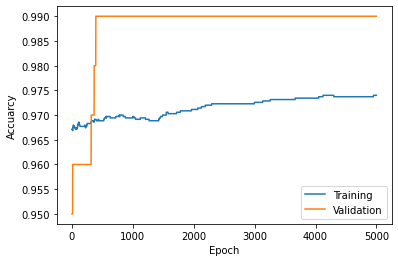

The reported accuracy for the learning rate  0.0001  is:  [0.97241379]


In [ ]:
for alpha in [0.005, 0.001, 0.0001]:
  epochs = 5000
  reg = 0
  error_tol = 1e-7
  acc = train(alpha, epochs, reg, error_tol)
  print("The reported accuracy for the learning rate ", alpha, " is: ", acc)

Discussion: I would use learning rate = 0.0001, because it results in best validation accuracy. 

# 4. Generalization

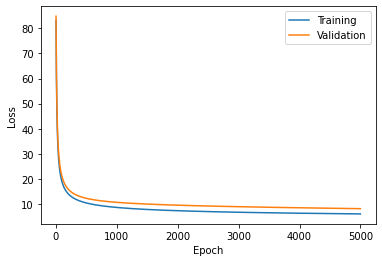

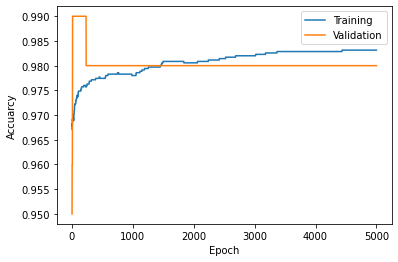

The reported accuracy for the regularization parameter  0.001  is:  [0.97931034]


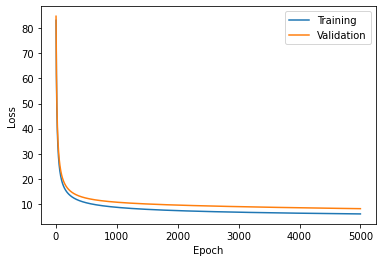

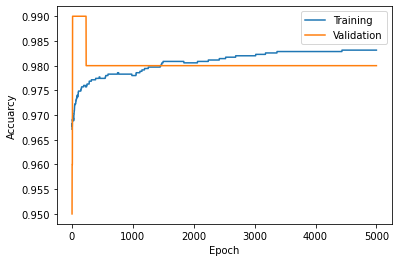

The reported accuracy for the regularization parameter  0.1  is:  [0.97931034]


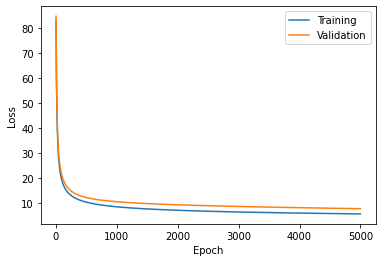

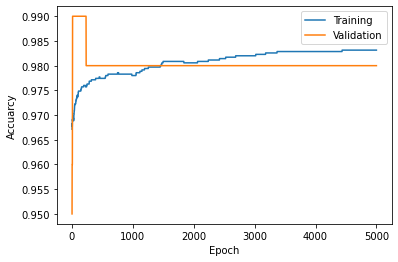

The reported accuracy for the regularization parameter  0.5  is:  [0.97931034]


In [ ]:
for reg in [0.001, 0.1, 0.5]:
  alpha = 0.005
  epochs = 5000
  error_tol = 1e-7
  acc = train(alpha, epochs, reg, error_tol)
  print("The reported accuracy for the regularization parameter ", reg, " is: ", acc)

Discussion: All three hyperparameters have the same validation accuracy, therefore it's ok to choose any of them